In [ ]:
# EXERCISE 4 

# Compare the positions of
# - the centroid of Lombardy as a region 
# - the centroid of the town that is more distant from the regional borders. 

# Tips: 

# Check "dissolve", "boundary", "sjoin"
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html
# https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

# In order to use "sjoin", both lists of shapes must be geo-dataframes types
# https://gis.stackexchange.com/questions/403129/geopandas-spatial-join-error-left-df-should-be-geodataframe-got-class-geop


### Esempio 4: comparare il centroide della regione Lombardia con il centroide del comune che è più distante dai confini della regione

In [3]:
# Import libraries

import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

Si procede calcolando il centroide della regione Lombardia

In [4]:
# Load the "comuni" shapefile as a geopandas dataframe

shapefile = './regione_lomb_1/Comuni_2020_poligonali.shp'
comuni = gpd.GeoDataFrame.from_file(shapefile)
comuni

,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
0,0570159f-0e0f-4edd-824c-23388d03a009,I276,03018144,SANT`ANGELO LOMELLINA,18,PAVIA,PV,None,None,12,...,0,18144,None,030328,ATS DI PAVIA,None,None,1.039710e+07,16920.894524,"POLYGON ((473246.942 5007601.023, 473219.080 5..."
1,560529b7-af1e-4dee-a47b-8dd8541bc6b6,D367,03015101,DRESANO,15,MILANO,MI,None,None,10,...,0,15101,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,3.505868e+06,9639.637073,"POLYGON ((527474.560 5024855.804, 527522.560 5..."
2,f3df939e-5fb6-4ccb-b040-bcfc0ee5b550,E608,03018082,LIRIO,18,PAVIA,PV,None,None,12,...,0,18082,None,030328,ATS DI PAVIA,None,None,1.801643e+06,6545.893954,"POLYGON ((520442.619 4983554.516, 520455.695 4..."
3,1274f1c9-79a2-40a4-8e4b-9e18bb967257,A849,03108009,BIASSONO,108,MONZA E DELLA BRIANZA,MB,None,None,11,...,0,108009,None,030324,ATS DELLA BRIANZA,None,None,4.793857e+06,16331.735972,"POLYGON ((521794.699 5052163.025, 521708.324 5..."
4,2eb51e8c-a2ce-418d-ba5e-ec32d2b3f219,L778,03017196,VEROLAVECCHIA,17,BRESCIA,BS,None,None,2,...,0,17196,None,030326,ATS DI BRESCIA,None,None,2.105491e+07,33160.467156,"POLYGON ((583283.590 5014246.553, 583277.806 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,fe5b9f49-0505-4d8f-b73e-b3a7e10c0e37,C014,03015060,CASSINA DE PECCHI,15,MILANO,MI,None,None,10,...,0,15060,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,7.070506e+06,17667.580037,"POLYGON ((528708.395 5041461.670, 528725.645 5..."
1502,8d59f56a-40ec-40a3-bb7a-58e72fe2f9cc,L115,03012126,TERNATE,12,VARESE,VA,None,None,14,...,0,12126,None,030322,ATS DELL'INSUBRIA,None,None,4.806990e+06,10923.525906,"POLYGON ((477662.950 5071290.280, 477655.800 5..."
1503,701c4634-f460-4aa5-9d41-074c4d85f4d7,H760,03013204,SAN BARTOLOMEO VAL CAVARGNA,13,COMO,CO,ZO16,VALLI DEL LARIO E DEL CERESIO,3,...,0,13204,None,030322,ATS DELL'INSUBRIA,None,None,1.055159e+07,18470.015263,"POLYGON ((511297.948 5102180.335, 511296.073 5..."
1504,f55a7a8b-7563-43b2-b12f-658e9b997bcc,G889,03013189,PORLEZZA,13,COMO,CO,ZO16,VALLI DEL LARIO E DEL CERESIO,3,...,0,13189,None,030322,ATS DELL'INSUBRIA,None,None,1.902149e+07,24473.450557,"POLYGON ((512470.245 5095391.447, 512469.245 5..."


In [18]:
# First, dissolve "comuni" into a new geodataframe entity

regione = comuni.dissolve(by='NOME_REG', as_index=False)
# regione = comuni.dissolve()  soluzione equivalente prof
regione['centroid'] = regione.centroid
regione

,NOME_REG,geometry,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,centroid
0,LOMBARDIA,"MULTIPOLYGON (((522592.400 4956732.848, 522589...",0570159f-0e0f-4edd-824c-23388d03a009,I276,03018144,SANT`ANGELO LOMELLINA,18,PAVIA,PV,ZO05,...,0,18144,http://www.cartografia.regione.lombardia.it/me...,030328,ATS DI PAVIA,001,CITTA' METROPOLITANA DI MILANO,1.039710e+07,16920.894524,POINT (559950.945 5052016.840)


In [20]:
regione.centroid  # più avanti verrà converito in geodataframe

0    POINT (559950.945 5052016.840)
dtype: geometry

<AxesSubplot:>

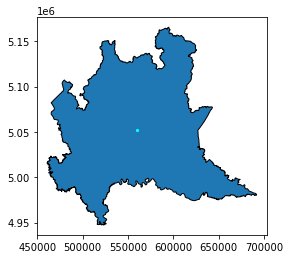

In [17]:
axr = regione.plot(edgecolor='black')
regione.centroid.plot(ax=axr, color="cyan", markersize=5)

In [19]:
# Second, find out in which town the centroid of "regione" is located

# In order to associate a list of geometries from one geo-df to a list of geometries from another geo-df,
#  we can perform a spatial join operation using "sjoin" !!! importante

# (A) Arrange both "regione" and its centroid as geo-dataframes
gpd.GeoDataFrame(regione[['geometry']])

regione_centr = gpd.GeoDataFrame()
regione_centr.geometry = regione.centroid  # non è più data come nella cella sopra
regione_centr



,geometry
0,POINT (559950.945 5052016.840)


In [22]:
comuni

,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,ANNO,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry
0,0570159f-0e0f-4edd-824c-23388d03a009,I276,03018144,SANT`ANGELO LOMELLINA,18,PAVIA,PV,None,None,12,...,0,18144,None,030328,ATS DI PAVIA,None,None,1.039710e+07,16920.894524,"POLYGON ((473246.942 5007601.023, 473219.080 5..."
1,560529b7-af1e-4dee-a47b-8dd8541bc6b6,D367,03015101,DRESANO,15,MILANO,MI,None,None,10,...,0,15101,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,3.505868e+06,9639.637073,"POLYGON ((527474.560 5024855.804, 527522.560 5..."
2,f3df939e-5fb6-4ccb-b040-bcfc0ee5b550,E608,03018082,LIRIO,18,PAVIA,PV,None,None,12,...,0,18082,None,030328,ATS DI PAVIA,None,None,1.801643e+06,6545.893954,"POLYGON ((520442.619 4983554.516, 520455.695 4..."
3,1274f1c9-79a2-40a4-8e4b-9e18bb967257,A849,03108009,BIASSONO,108,MONZA E DELLA BRIANZA,MB,None,None,11,...,0,108009,None,030324,ATS DELLA BRIANZA,None,None,4.793857e+06,16331.735972,"POLYGON ((521794.699 5052163.025, 521708.324 5..."
4,2eb51e8c-a2ce-418d-ba5e-ec32d2b3f219,L778,03017196,VEROLAVECCHIA,17,BRESCIA,BS,None,None,2,...,0,17196,None,030326,ATS DI BRESCIA,None,None,2.105491e+07,33160.467156,"POLYGON ((583283.590 5014246.553, 583277.806 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,fe5b9f49-0505-4d8f-b73e-b3a7e10c0e37,C014,03015060,CASSINA DE PECCHI,15,MILANO,MI,None,None,10,...,0,15060,None,030321,ATS DELLA CITTA' METROPOLITANA DI MILANO,001,CITTA' METROPOLITANA DI MILANO,7.070506e+06,17667.580037,"POLYGON ((528708.395 5041461.670, 528725.645 5..."
1502,8d59f56a-40ec-40a3-bb7a-58e72fe2f9cc,L115,03012126,TERNATE,12,VARESE,VA,None,None,14,...,0,12126,None,030322,ATS DELL'INSUBRIA,None,None,4.806990e+06,10923.525906,"POLYGON ((477662.950 5071290.280, 477655.800 5..."
1503,701c4634-f460-4aa5-9d41-074c4d85f4d7,H760,03013204,SAN BARTOLOMEO VAL CAVARGNA,13,COMO,CO,ZO16,VALLI DEL LARIO E DEL CERESIO,3,...,0,13204,None,030322,ATS DELL'INSUBRIA,None,None,1.055159e+07,18470.015263,"POLYGON ((511297.948 5102180.335, 511296.073 5..."
1504,f55a7a8b-7563-43b2-b12f-658e9b997bcc,G889,03013189,PORLEZZA,13,COMO,CO,ZO16,VALLI DEL LARIO E DEL CERESIO,3,...,0,13189,None,030322,ATS DELL'INSUBRIA,None,None,1.902149e+07,24473.450557,"POLYGON ((512470.245 5095391.447, 512469.245 5..."


In [23]:
regione_centr

,geometry
0,POINT (559950.945 5052016.840)


In [21]:
# (B) Make the spatial join
gpd.sjoin(comuni, regione_centr)

# ci dice che il centroide della regione Lombardia si trova nel comune di Cavernago

# cavernago sarebbe il centroide della regione

,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry,index_right
677,80a63381-f100-4842-b7c1-0eaefaff8a98,C396,03016066,CAVERNAGO,16,BERGAMO,BG,None,None,1,...,16066,None,030325,ATS DI BERGAMO,None,None,7.743260e+06,13950.727413,"POLYGON ((557760.605 5050801.940, 557784.714 5...",0


Ora si calcola il centroide della città che è più distante dai confini regionali

In [24]:
# Third, 
# - calculate the distance of town centroids from the borders of the region     
# - find out which town's centroid is the most distant from the border

comuni['dist_border'] = comuni.centroid.apply(lambda db:regione.boundary.distance(db)/1000)

In [25]:
# Fourth, calculate the distance between the centroid of the region, 
#        and the centroid of the last town in ranking for distance with the border

comuni[comuni['dist_border']==comuni['dist_border'].max()]

# è il centroide più distante dai confini regionali è quello del comune di Bagnatica

,CLASSREF,BELFIORE,COD_ISTATN,NOME_COM,COD_PRO,NOME_PRO,SIG_PRO,COD_CMO,NOME_CMO,COD_ASL,...,ISTAT,LEGGE_ISTI,ATS_COD,ATS_DEC,CMETR_COD,CMETR_DEC,SHAPE_AREA,SHAPE_LEN,geometry,dist_border
823,833788b7-1184-41fd-a725-f44cab4232d6,A557,03016018,BAGNATICA,16,BERGAMO,BG,None,None,1,...,16018,None,030325,ATS DI BERGAMO,None,None,6.358466e+06,13488.533426,"POLYGON ((558305.045 5056420.653, 558385.860 5...",58.267493


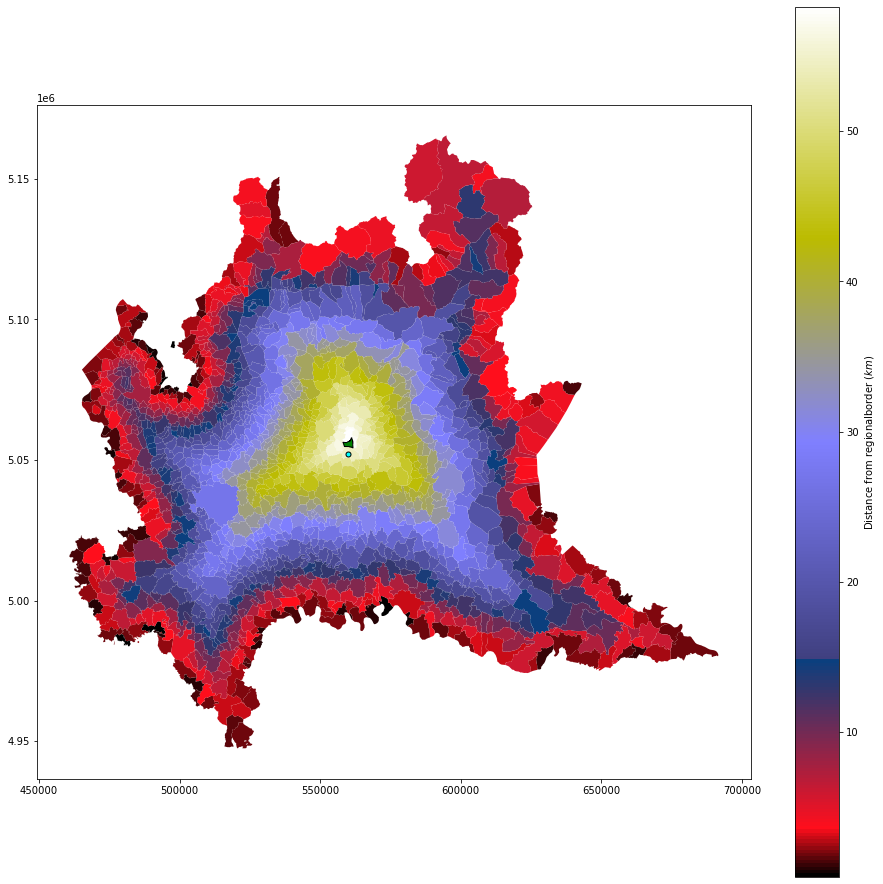

In [31]:
# Last, plot
# visualizziamo in turchese il centroide della regione e in verde la città il cui centroide è quello più distante dai confini regionali

fig, ax = plt.subplots(figsize=(16, 16))

comuni.plot(ax=ax,column=comuni['dist_border'], cmap='gist_stern', legend=True,legend_kwds={'label': 'Distance from regionalborder ($km$)'})

# Visualize the centroid of "regione"
regione.centroid.plot(ax=ax, color="cyan", markersize=25, edgecolor="black")

# Visualize the town whose centroid is the farthest from the regioanl boundary
comuni[comuni['dist_border']==comuni['dist_border'].max()].plot(ax=ax, color="green", markersize=25, edgecolor="black")
plt.show()

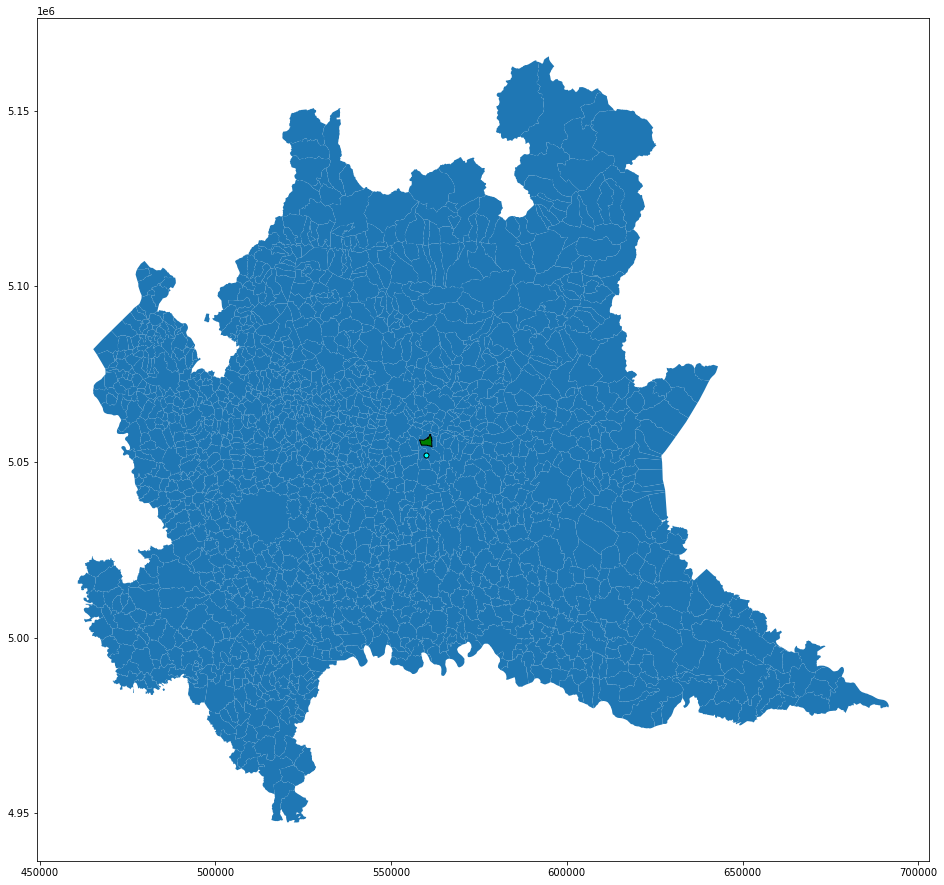

In [37]:
# grafico test più semplice

fig, ax = plt.subplots(figsize=(16, 16))

comuni.plot(ax=ax)
regione.centroid.plot(ax=ax, color="cyan", markersize=25, edgecolor="black")
comuni[comuni['dist_border']==comuni['dist_border'].max()].plot(ax=ax, color="green", markersize=25, edgecolor="black")
plt.show()